**Chapter 01 Python Note Book**

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
from sklearn.metrics import mean_squared_error
np.random.seed(42)
from pathlib import Path

In [5]:
# Load the data
# The Organisation for Economic Co-operation and Development (OECD)
oecd_bli = pd.read_csv('oecd_bli_2015.csv', thousands = ',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv", thousands= ',', delimiter = '\t', encoding = 'latin1', na_values = 'n/a')

In [6]:
oecd_bli

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.10,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.00,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.00,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.20,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.90,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3287,EST,Estonia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.43,NaN,NaN
3288,ISR,Israel,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.24,E,Estimated value
3289,RUS,Russia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.75,E,Estimated value
3290,SVN,Slovenia,WL_TNOW,Time devoted to leisure and personal care,L,Value,WMN,Women,HOUR,Hours,0,units,NaN,NaN,14.12,NaN,NaN


In [7]:
gdp_per_capita

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
...,...,...,...,...,...,...,...
185,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
186,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0
188,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1064.350,2012.0


In [8]:
features_oecd = np.array(oecd_bli.columns)
features_gdp = np.array(gdp_per_capita.columns)
print('Features of OECD data:\n', features_oecd,'\n')
print('Features of GDP per capita data:\n', features_gdp, '\n')

Features of OECD data:
 ['LOCATION' 'Country' 'INDICATOR' 'Indicator' 'MEASURE' 'Measure'
 'INEQUALITY' 'Inequality' 'Unit Code' 'Unit' 'PowerCode Code' 'PowerCode'
 'Reference Period Code' 'Reference Period' 'Value' 'Flag Codes' 'Flags'] 

Features of GDP per capita data:
 ['Country' 'Subject Descriptor' 'Units' 'Scale'
 'Country/Series-specific Notes' '2015' 'Estimates Start After'] 



In [9]:
# check a GPD per capita in the specific country
country_name = 'Russia'
gdp_per_capita[gdp_per_capita["Country"] == country_name]

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
137,Russia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0


In [10]:
### Prepare tha data
### 
def prepare_country_stats(oecd_bli, gdp_per_capita, percent_of_testing_data = 30):
    # filters out all OECD data where inequality is total
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    # reorganize OECD data where rows(indices) are Countries
    # columns are Indicators and the numbers in the dataFrame are Values
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    # renaming the columns GDP per capital for the year 2015
    # to be named GDP per capita
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    # take column named Country from GDP per capita and place it as an index(row)
    # in the same dataFrame
    gdp_per_capita.set_index("Country", inplace=True)
    # merge two augmented dataFrames, where left one is OECD dataFrame and
    # the right one is GDP dataFrame
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    # sorting the values according to GDP per capital number
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    # create test set(30% of full country stats data)
    # by removing the indices from some countries
    N, D = full_country_stats.shape
    # random permutation of indices
    rand_permutation = np.random.permutation(N)
    # (default = 30%) of data is going to be part of testing dataset
    len_test_dataset = int(round(N * percent_of_testing_data / 100,0))
    # store all testing indices
    test_dataset_indices = rand_permutation[0:len_test_dataset]
    # store all training indices 
    train_dataset_indices = rand_permutation[len_test_dataset:]
    # raturn train set and test set as dataFrames
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[train_dataset_indices], full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[test_dataset_indices]

In [11]:
train_data, test_data = prepare_country_stats(oecd_bli, gdp_per_capita)

In [12]:
train_data

,GDP per capita,Life satisfaction
Country,,
Switzerland,80675.308,7.5
Brazil,8669.998,7.0
Hungary,12239.894,4.9
Australia,50961.865,7.3
Italy,29866.581,6.0
France,37675.006,6.5
Poland,12495.334,5.8
Portugal,19121.592,5.1
Mexico,9009.280,6.7


In [13]:
test_data

,GDP per capita,Life satisfaction
Country,,
Luxembourg,101994.093,6.9
Spain,25864.721,6.5
United Kingdom,43770.688,6.8
Ireland,51350.744,7.0
Japan,32485.545,5.9
Denmark,52114.165,7.5
Germany,40996.511,7.0
Slovenia,20732.482,5.7
Czech Republic,17256.918,6.5


In [14]:
# DATA x and LABELS y
## TRAINING DATA
# GDP is data
x = np.c_[train_data["GDP per capita"]]
# life satisfaction is label
y = np.c_[train_data["Life satisfaction"]]

## TESTING DATA
# GDP is data
test_x = np.c_[test_data["GDP per capita"]]
# life satisfaction is label
test_y = np.c_[test_data["Life satisfaction"]]


In [15]:
x

array([[80675.308],
       [ 8669.998],
       [12239.894],
       [50961.865],
       [29866.581],
       [37675.006],
       [12495.334],
       [19121.592],
       [ 9009.28 ],
       [43603.115],
       [ 9054.914],
       [74822.106],
       [ 9437.372],
       [55805.204],
       [43331.961],
       [49866.266],
       [18064.288],
       [41973.988],
       [37044.891],
       [43724.031],
       [13340.905],
       [40106.632],
       [15991.736],
       [27195.197],
       [50854.583]])

In [16]:
y

array([[7.5],
       [7. ],
       [4.9],
       [7.3],
       [6. ],
       [6.5],
       [5.8],
       [5.1],
       [6.7],
       [7.3],
       [6. ],
       [7.4],
       [5.6],
       [7.2],
       [7.3],
       [7.2],
       [4.8],
       [7.4],
       [7.3],
       [6.9],
       [6.7],
       [6.9],
       [6.1],
       [5.8],
       [7.5]])

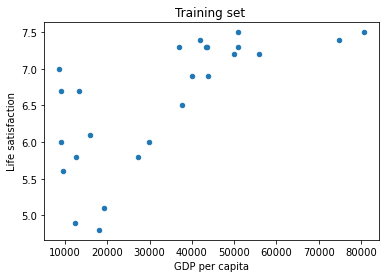

In [17]:
# Visualize the data
train_data.plot(kind = 'scatter', x = 'GDP per capita', y = 'Life satisfaction', title = 'Training set ')
plt.show()

In [18]:
# select a linear model/hypothesis
lin_model = sklearn.linear_model.LinearRegression()
# apply model to our training data
lin_model.fit(x,y)
# make prediction for one desired index of testing dataset
desired_index = 5
true_GDP, true_life_satisfaction = test_x[desired_index][0], test_y[desired_index][0]
# predict satisfation (label) based on its GDP from a point that belongs to the test set
predicted_life_satisfaction = lin_model.predict([[true_GDP]])[0][0]
print("Relative error of estimated life satisfaction =",abs(true_life_satisfaction - predicted_life_satisfaction)/true_life_satisfaction *100, "%")

Relative error of estimated life satisfaction = 5.19711411730268 %


In [19]:
#weights of a linear model
w_0, w_1 = lin_model.intercept_[0], lin_model.coef_[0][0]
print("Linear model:\n "+f'{w_0:.5}'+" + GPD * "+f'{w_1:.5}')

Linear model:
 5.6005 + GPD * 2.8969e-05


In [20]:
# calcualting MSE for training set
predictions = []
true_values = []
for i in range(len(x)):
    true_GDP, true_life_satisfaction = x[i][0], y[i][0]
    # predict satisfation (label) based on its GDP from a point that belongs to the test set
    predicted_life_satisfaction = lin_model.predict([[true_GDP]])[0][0]
    predictions.append(predicted_life_satisfaction)
    true_values.append(true_life_satisfaction)
    print("Relative error of estimated life satisfaction = " +f"{abs(true_life_satisfaction - predicted_life_satisfaction)/true_life_satisfaction *100:.5}"+ "%")
MSE_train= mean_squared_error(true_values, predictions)
print("Mean squared error on test set is " + f"{MSE_train:.5}.")

Relative error of estimated life satisfaction = 5.8349%
Relative error of estimated life satisfaction = 16.405%
Relative error of estimated life satisfaction = 21.532%
Relative error of estimated life satisfaction = 3.0571%
Relative error of estimated life satisfaction = 7.762%
Relative error of estimated life satisfaction = 2.9527%
Relative error of estimated life satisfaction = 2.8014%
Relative error of estimated life satisfaction = 20.675%
Relative error of estimated life satisfaction = 12.515%
Relative error of estimated life satisfaction = 5.9773%
Relative error of estimated life satisfaction = 2.2864%
Relative error of estimated life satisfaction = 4.9737%
Relative error of estimated life satisfaction = 4.891%
Relative error of estimated life satisfaction = 0.2381%
Relative error of estimated life satisfaction = 6.0849%
Relative error of estimated life satisfaction = 2.1514%
Relative error of estimated life satisfaction = 27.579%
Relative error of estimated life satisfaction = 7.

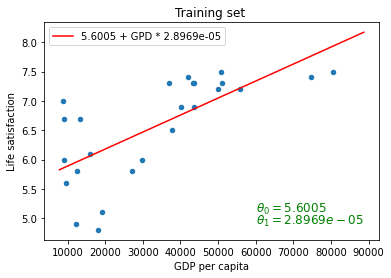

In [21]:
# Visualize the data and the linear regression on Training set
GDPs=np.linspace(np.min(x)*0.9, np.max(x) * 1.1, np.size(x))
train_data.plot(kind = 'scatter', x = 'GDP per capita', y = 'Life satisfaction', title = 'Training set ')
plt.plot(GDPs, w_0 + GDPs * w_1, label = f'{w_0:.5}'+" + GPD * "+f'{w_1:.5}', c= 'r')
plt.text(60000, 5.1, r"$\theta_0 = "+f'{w_0:.5}'+"$", fontsize=12, color="g")
plt.text(60000, 4.9, r"$\theta_1 =  "+f'{w_1:.5}'+"$", fontsize=12, color="g")
plt.legend()
plt.show()

In [22]:
# testing
predictions = []
true_values = []
for i in range(len(test_x)):
    true_GDP, true_life_satisfaction = test_x[i][0], test_y[i][0]
    # predict satisfation (label) based on its GDP from a point that belongs to the test set
    predicted_life_satisfaction = lin_model.predict([[true_GDP]])[0][0]
    predictions.append(predicted_life_satisfaction)
    true_values.append(true_life_satisfaction)
    print("Relative error of estimated life satisfaction = " +f"{abs(true_life_satisfaction - predicted_life_satisfaction)/true_life_satisfaction *100:.5}"+ "%")
MSE_test = mean_squared_error(true_values, predictions)
print("Mean squared error on test set is " + f"{MSE_test:.5}.")

Relative error of estimated life satisfaction = 23.989%
Relative error of estimated life satisfaction = 2.311%
Relative error of estimated life satisfaction = 1.0075%
Relative error of estimated life satisfaction = 1.2586%
Relative error of estimated life satisfaction = 10.874%
Relative error of estimated life satisfaction = 5.1971%
Relative error of estimated life satisfaction = 3.0265%
Relative error of estimated life satisfaction = 8.7914%
Relative error of estimated life satisfaction = 6.1473%
Relative error of estimated life satisfaction = 10.481%
Relative error of estimated life satisfaction = 8.9523%
Mean squared error on test set is 0.42244.


In [23]:
print("Absolute error between MSEs of train and test set is", f"{abs(MSE_test - MSE_train)*100:.5}"+" %")
print("Relative error between MSEs of train and test set is", f"{abs(MSE_test - MSE_train)/MSE_train*100:.5}"+" %")
print("Ratio between MSEs of train and test set is", f"{MSE_test/MSE_train:.5}")

Absolute error between MSEs of train and test set is 6.4346 %
Relative error between MSEs of train and test set is 17.969 %
Ratio between MSEs of train and test set is 1.1797
